In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 data=pd.read_csv("housing.csv")

In [3]:
data.dropna(inplace=True)

In [4]:
from sklearn.model_selection import train_test_split
x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']


In [5]:
import joblib
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)
joblib.dump(list(X_train.columns), "feature_columns.joblib")


['feature_columns.joblib']

In [6]:
train_data=X_train.join(Y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

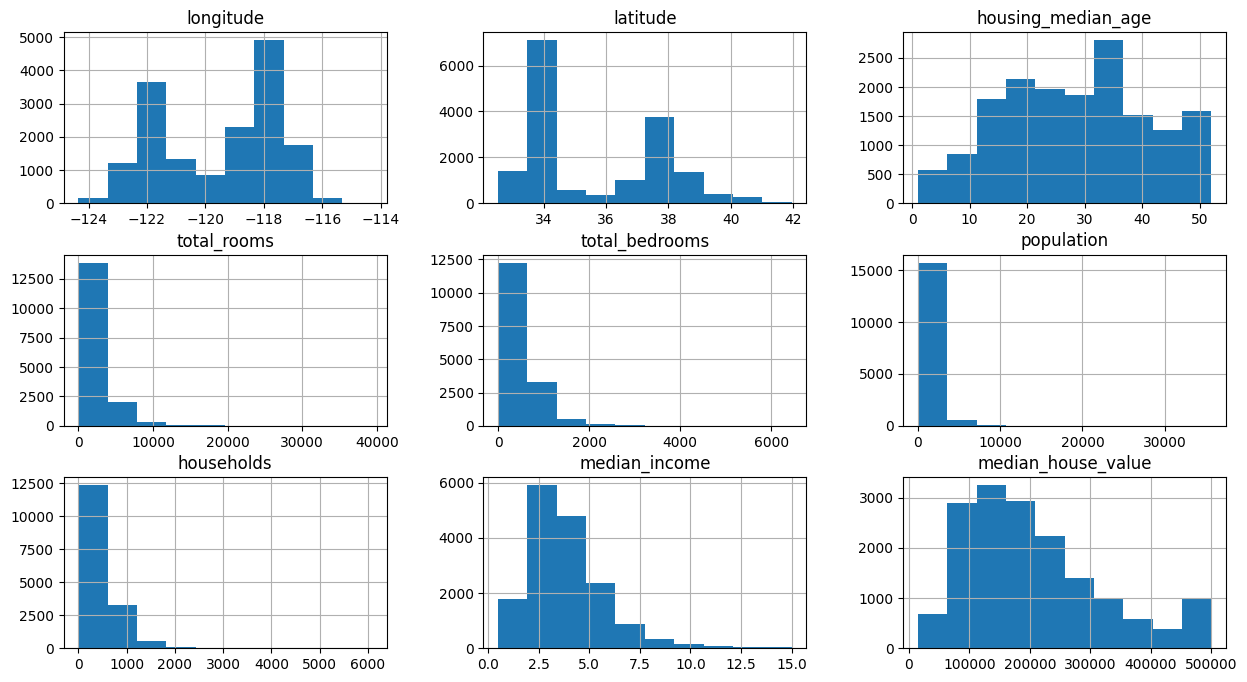

In [7]:
train_data.hist(figsize=(15,8))

In [8]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['households']=np.log(train_data['households']+1)
train_data['population']=np.log(train_data['population']+1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

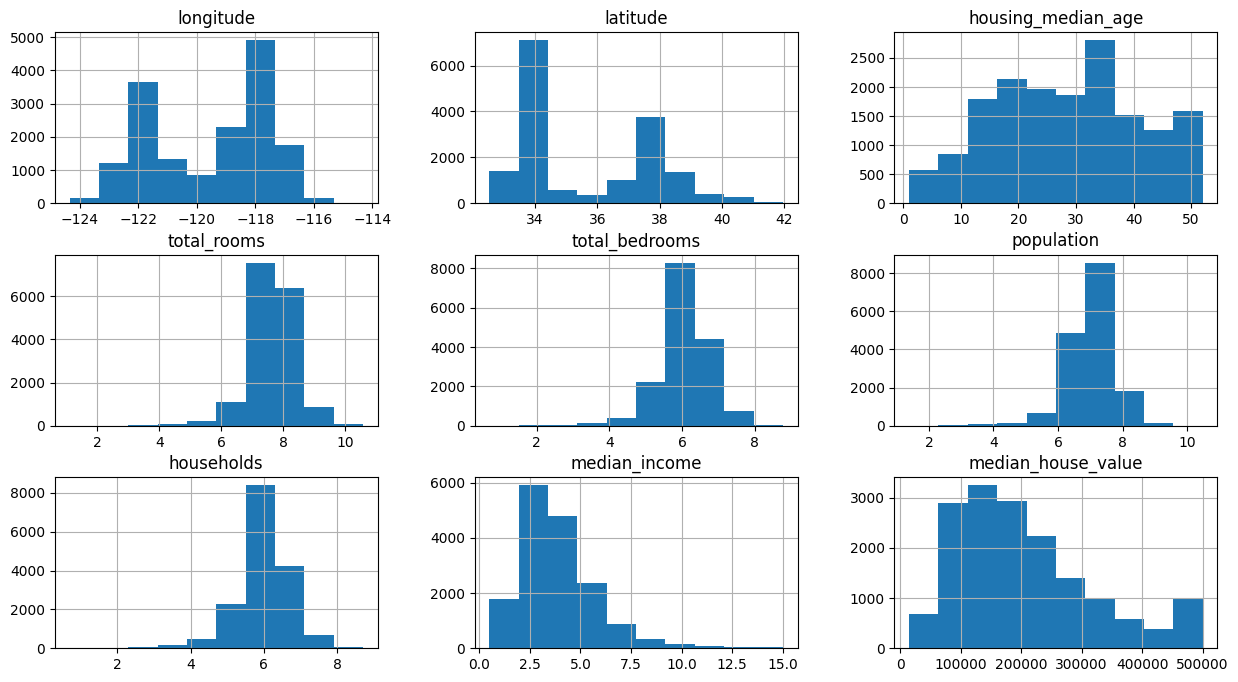

In [9]:
train_data.hist(figsize=(15,8))

<Axes: >

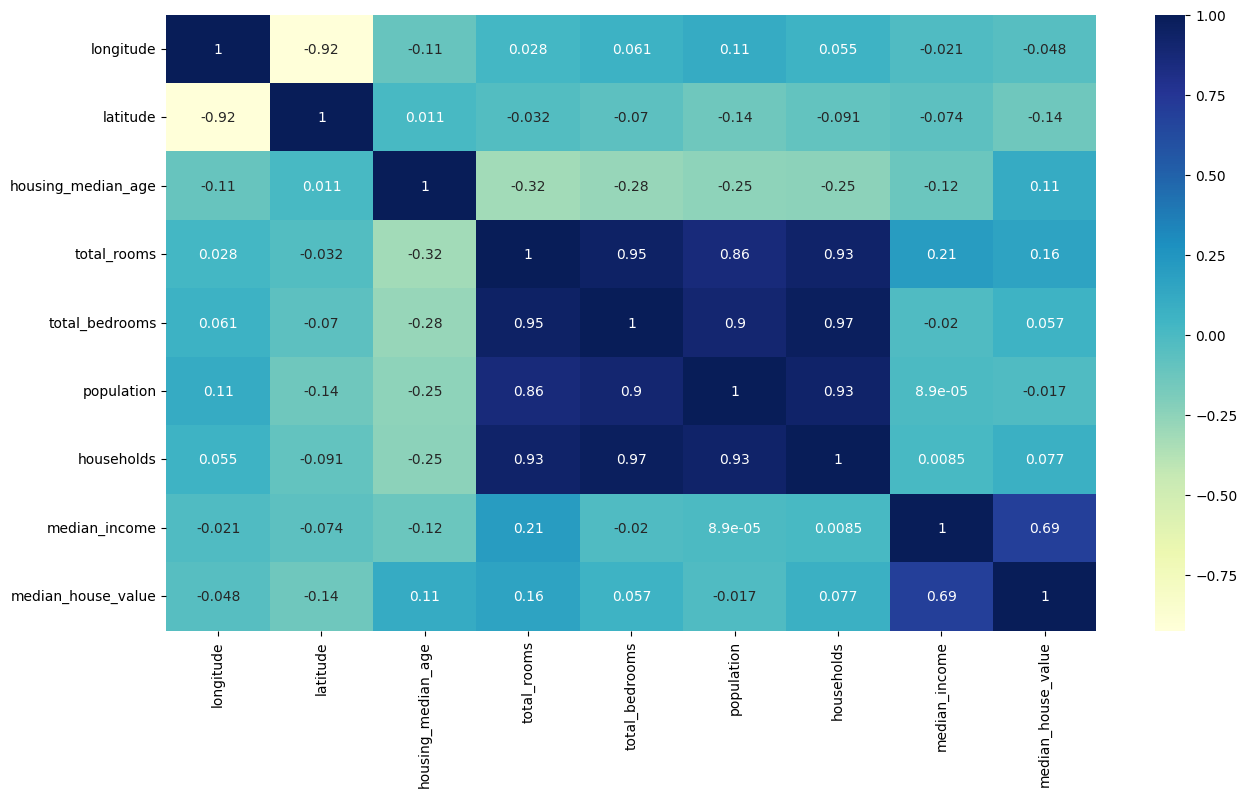

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap="YlGnBu")

In [11]:
train_data=train_data.join(pd.get_dummies(        train_data.ocean_proximity,
        prefix="ocean_proximity",
        dtype=int
)).drop(['ocean_proximity'],axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
5004,-118.32,34.02,48.0,7.575585,5.733341,6.714171,5.831882,3.3906,189700.0,1,0,0,0,0
10415,-117.58,33.65,4.0,7.382124,6.212606,6.704414,6.056784,3.3750,500001.0,1,0,0,0,0
47,-122.27,37.82,43.0,6.915723,5.746203,6.326149,5.537334,1.7348,137500.0,0,0,0,1,0
4105,-118.34,34.12,41.0,8.088869,6.522093,7.121252,6.459904,4.2415,409600.0,1,0,0,0,0
13805,-117.03,34.91,27.0,7.908019,6.369901,7.295056,6.234411,2.8250,76600.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12752,-121.37,38.62,43.0,6.982863,5.298317,6.104793,5.209486,3.0139,115600.0,0,1,0,0,0
6237,-117.96,34.06,31.0,7.609862,6.137727,7.288244,6.126869,2.0670,167300.0,1,0,0,0,0
10878,-117.88,33.72,36.0,7.555382,5.866468,7.374002,5.799093,3.8900,170000.0,1,0,0,0,0
1008,-121.76,37.68,35.0,7.531016,5.880533,7.081709,5.857933,4.2361,177500.0,0,1,0,0,0


<Axes: >

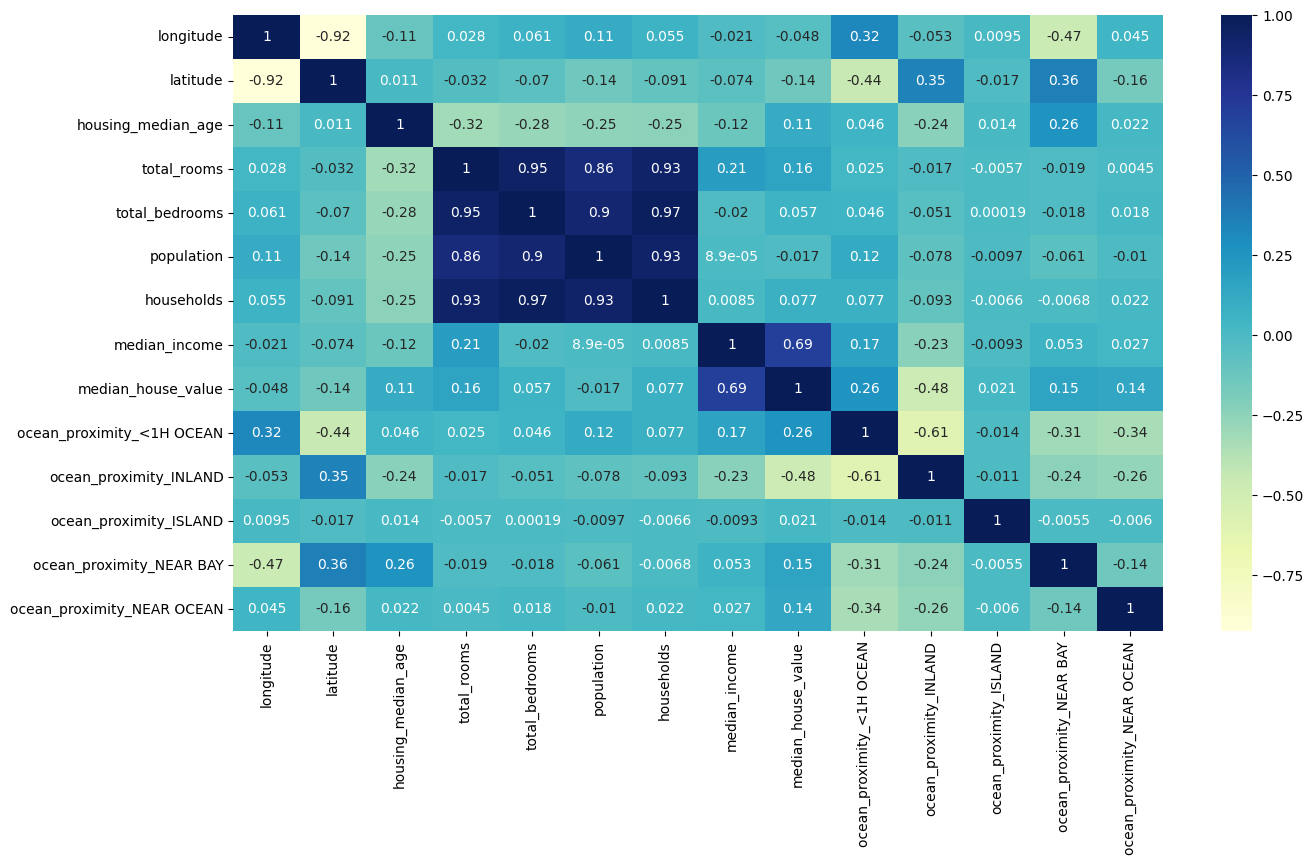

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

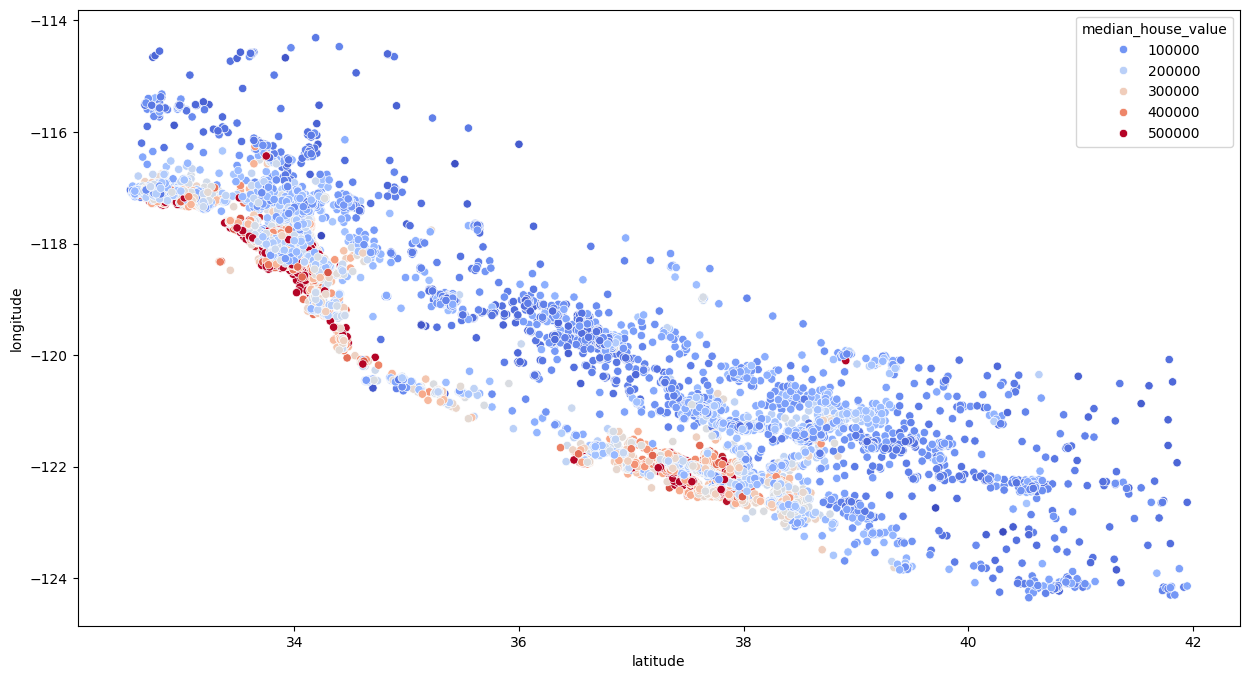

In [13]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [14]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

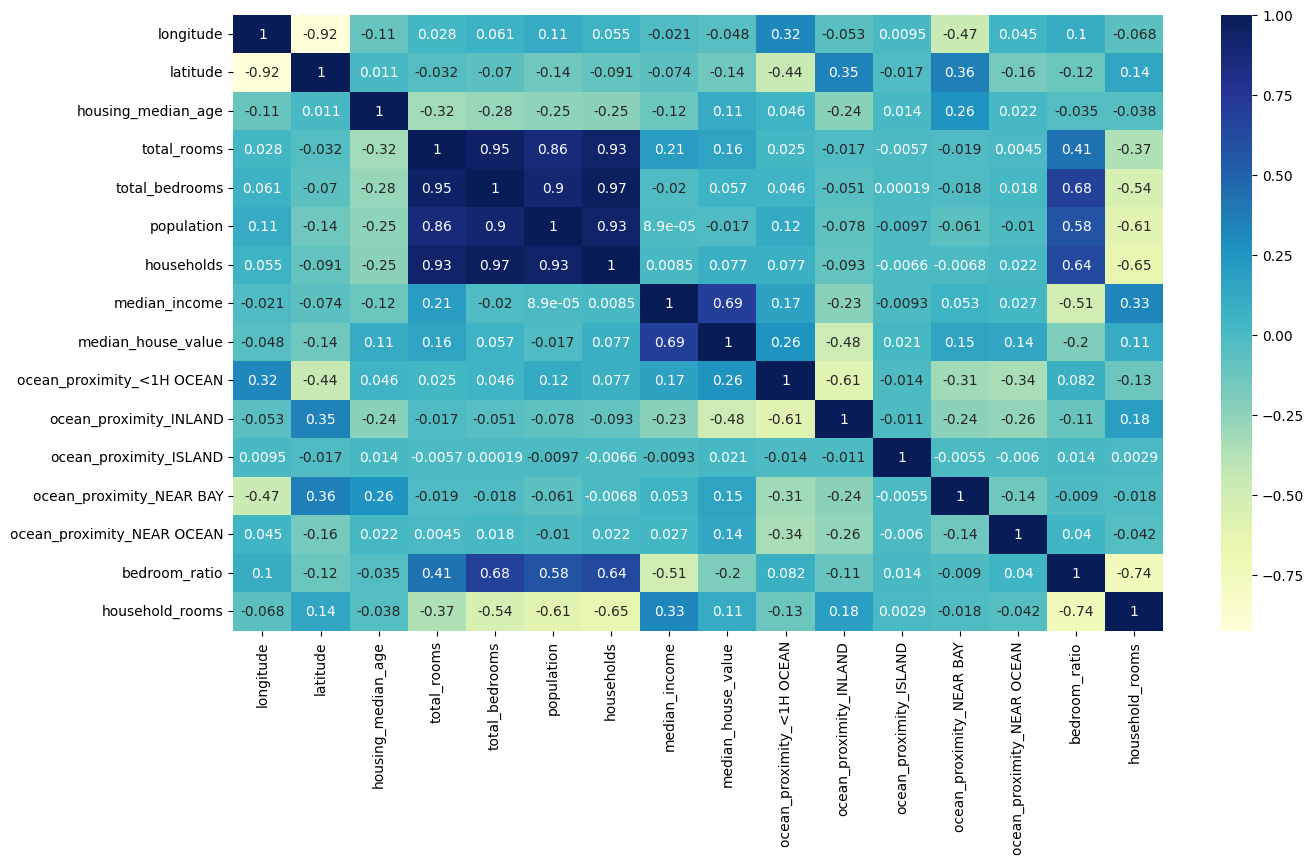

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

X_train,y_train=train_data.drop(['median_house_value'],axis=True),train_data['median_house_value']
X_train = X_train.drop(['bedroom_ratio', 'household_rooms'], axis=1)


X_train_s=scaler.fit_transform(X_train)
import joblib
joblib.dump(scaler, "scaler.joblib")

reg=LinearRegression()
reg.fit(X_train_s,y_train)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
5004,-118.32,34.02,48.0,7.575585,5.733341,6.714171,5.831882,3.3906,1,0,0,0,0
10415,-117.58,33.65,4.0,7.382124,6.212606,6.704414,6.056784,3.3750,1,0,0,0,0
47,-122.27,37.82,43.0,6.915723,5.746203,6.326149,5.537334,1.7348,0,0,0,1,0
4105,-118.34,34.12,41.0,8.088869,6.522093,7.121252,6.459904,4.2415,1,0,0,0,0
13805,-117.03,34.91,27.0,7.908019,6.369901,7.295056,6.234411,2.8250,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12752,-121.37,38.62,43.0,6.982863,5.298317,6.104793,5.209486,3.0139,0,1,0,0,0
6237,-117.96,34.06,31.0,7.609862,6.137727,7.288244,6.126869,2.0670,1,0,0,0,0
10878,-117.88,33.72,36.0,7.555382,5.866468,7.374002,5.799093,3.8900,1,0,0,0,0
1008,-121.76,37.68,35.0,7.531016,5.880533,7.081709,5.857933,4.2361,0,1,0,0,0


In [21]:
test_data=X_test.join(Y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['households']=np.log(test_data['households']+1)
test_data['population']=np.log(test_data['population']+1)


test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity,  prefix="ocean_proximity",
        dtype=int)).drop(['ocean_proximity'],axis=1)



In [22]:
X_test,y_test=test_data.drop(['median_house_value'],axis=True),test_data['median_house_value']
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0  
    
X_test = X_test[X_train.columns]
X_test_s = scaler.transform(X_test)


In [23]:
print("R²:", reg.score(X_test_s, y_test))


R²: 0.6602457632439539


In [24]:
from sklearn.ensemble import RandomForestRegressor

forest =RandomForestRegressor()

forest.fit(X_train_s,y_train)

RandomForestRegressor()

In [25]:
forest.score(X_test_s,y_test)

0.8320562404732234

In [26]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8],
    "min_samples_split":[2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(X_train_s, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [27]:
best_forest=grid_search.best_estimator_

In [28]:
best_forest.score(X_test_s,Y_test)

0.8289408298572958

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb


In [30]:
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    subsample=0.7,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train_s, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [31]:


y_pred = model.predict(X_test_s)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {model.score(X_test, y_test):.2f}")



RMSE: 49362.70
R² Score: -1.98


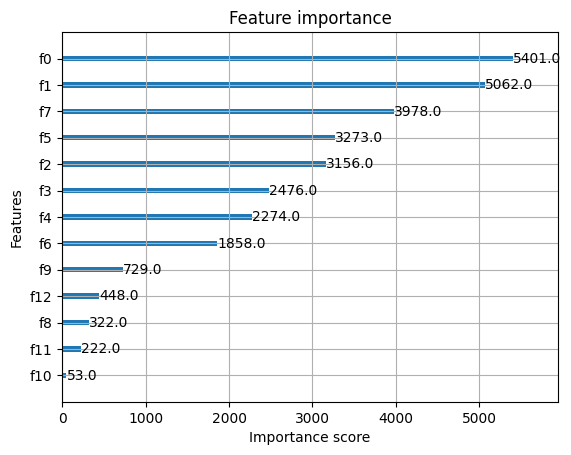

In [32]:
xgb.plot_importance(model)
plt.show()


In [33]:
import joblib
joblib.dump(model, "model.joblib")


['model.joblib']

In [38]:
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature

r2 = r2_score(y_test, y_pred)
X_test_df = pd.DataFrame(X_test_s, columns=X_train.columns)
input_example = X_test_df.iloc[[0]]
signature = infer_signature(X_test_df, model.predict(X_test_s))

with mlflow.start_run():
    mlflow.log_params(model.get_params())
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2_score", r2)
    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="xgb_model",
        input_example=input_example,
        signature=signature
    )



C:\Users\jayes\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
